### Problem Statement

Analyze the factors that influence the Price of Health Insurance.

Can you build a model to predict the Price of the Health insurance?

## Insights from the data:

1. The dataset consists of 1338 * 7 and has no null values. It comprises of numerical variables such as age, bmi, charges and categorical features such as sex, children, smoker and region.

2. Exploratory Data Analysis:

UNIVARIATE ANALYSIS

    - Age column is left skewed. So applying the log to convert into normal distribution.
    - Sex feature is almost evenly distributed between male and female
    - BMI is a numerical variable. Categorising BMI into underweight, healthy, overweight and obesity. We found only 16.6% od the customers are healthy. Thus, it seems that this feature is going to play a role in determining price.
    - Number of Children varies from 0 to 5.
    - variable Charge also is right skewed. This is our target variable.
    - Distribution of customers across regions like Northwest, Northeast, Southwest and Southeast. Soutwest region is densely populated.
    - 247 people smoke and 1047 don't.
    
MULTIVARIATE ANALYSIS

    - Higher charges to be paid by the smokers 
    - People with children tend to have higher medical costs overall as well.
    - As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast
    - Charges are based on the healthy status of the customers. Obese customers pay higher charges.
    - Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too
    
CORRELATION MATRIX

    - Smoking came out to be the most important featur in determining the charges. (correlation- 0.79)
    
3. MODEL BUILDING

        Choosing Linear regression to be our model since assumptions are justified.
                - variables are normally distributed
                - No sign of multicollinearity
                - no heteroscedasticity
                - no auto correlation

4. EVALUATING LINEAR REGRESSION MODEL

    - Metrics: MAE:  3990.2503849796185,         MSE:  33530131.141361613,       RMSE:  5790.520800529224

    - R square: 76%. Very good model accuracy.

    - Coefficients of the model :
                        age	241.214356
                        sex	65.157046
                        bmi	364.764764
                        children	498.862812
                        smoker	23440.629389
                        region	-340.606493
                        
5. CONCLUSION

Smoking is the most important feature in determining the charges. After this, children, BMI and age play a role.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

In [108]:
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df.shape

(1338, 7)

In [109]:
# check for null values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [110]:
#check the data types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Univariate analysis

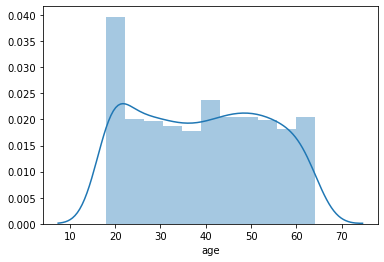

In [7]:
#1. Age:
sns.distplot(df['age'])

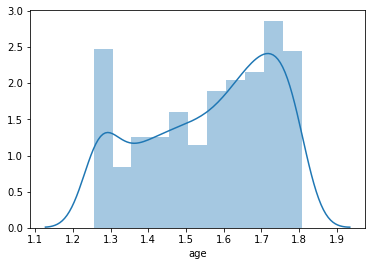

In [11]:
sns.distplot(np.log10(df['age']))

male      676
female    662
Name: sex, dtype: int64


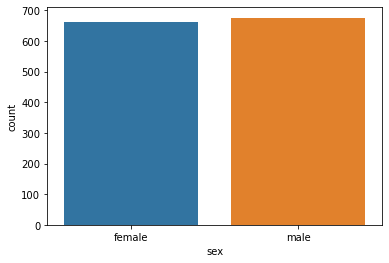

In [14]:
#2.sex :
sns.countplot(df['sex'])
print(df['sex'].value_counts())

Male and female are distributed almost equally

In [15]:
#3. bmi

df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [24]:
df['bmi_group']= df['bmi'].apply(lambda x: 'Underweight' if x< 18.5 else 'Healthy weight' if x< 24.9 else 'Overweight' 
                                 if x< 29.9 else 'Obesity')


px.pie(data_frame= df, names= df['bmi_group'].value_counts().index, values= df['bmi_group'].value_counts().values,
       title=' Number of individuals in different BMI groups' )

most number of people are unfit: obese and overweight

Text(0.5, 1.0, 'Distribution of children')

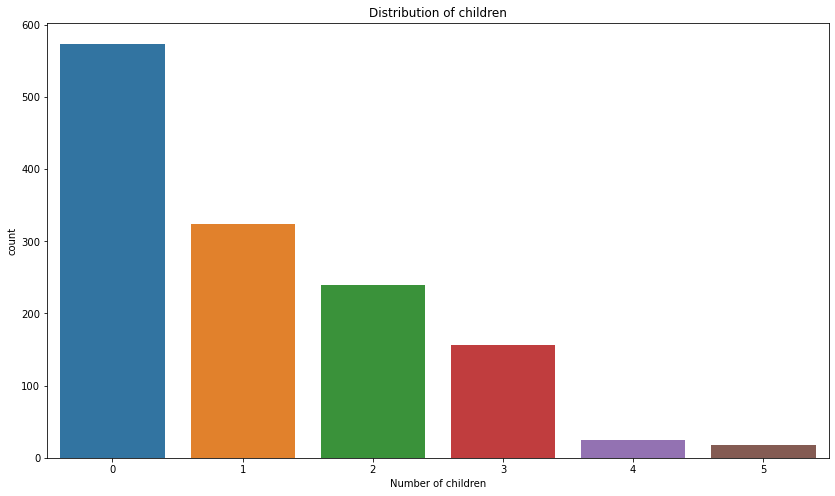

In [26]:
#4. Children

plt.figure(figsize=(14,8))
sns.countplot(df['children'])
plt.xlabel('Number of children')
plt.title('Distribution of children')

no     1064
yes     274
Name: smoker, dtype: int64


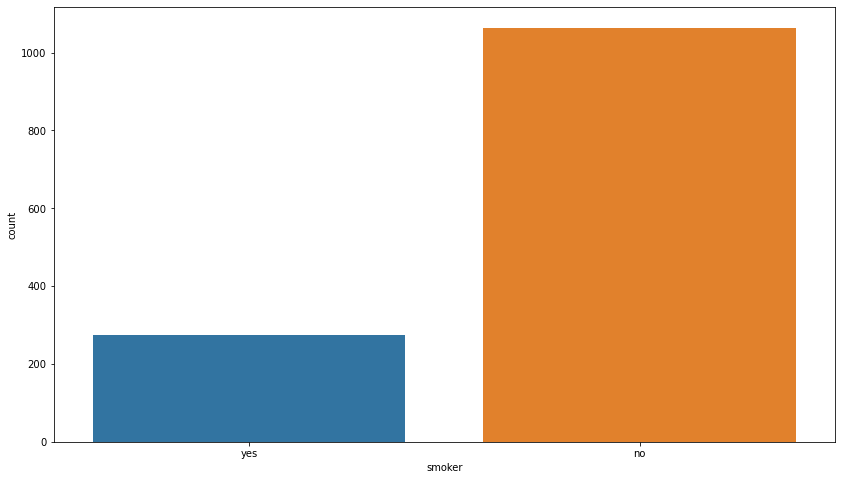

In [112]:
#5. Smokers

plt.figure(figsize=(14,8))
sns.countplot(df['smoker'])
print(df['smoker'].value_counts())

In [31]:
#6. Region
px.pie(data_frame=df, names= df['region'].value_counts().index, values= df['region'].value_counts().values)

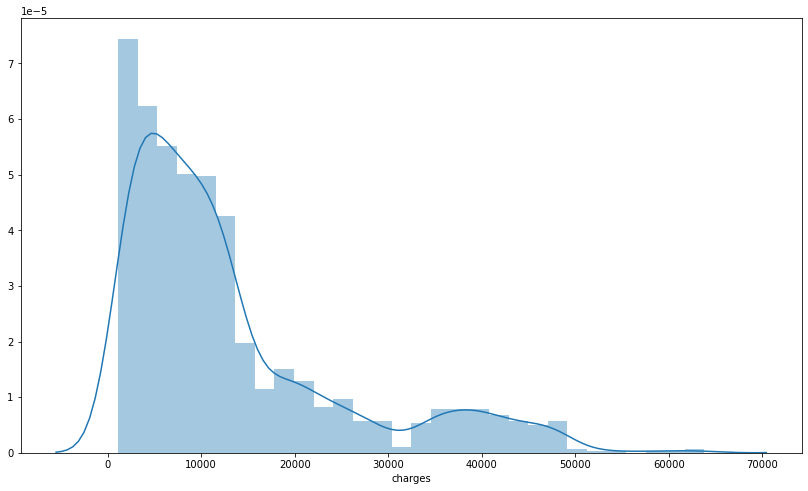

In [33]:
#7. Charges-- target variable

plt.figure(figsize=(14,8))
sns.distplot(df['charges'])

Not a normal distribution. 

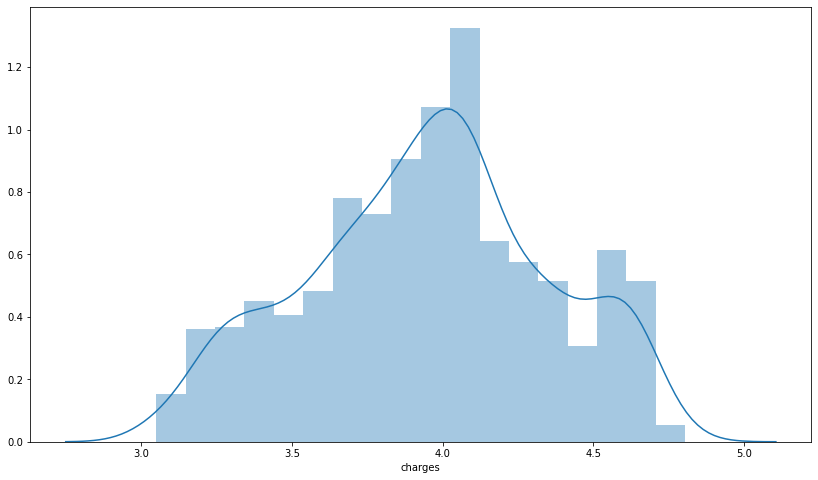

In [34]:
plt.figure(figsize=(14,8))
sns.distplot(np.log10(df['charges']))

After applying the LOG transformation charges feature becomes a normal distribution

### Bivariate & Multivariiate Analysis

In [36]:
#1. Age and charges

px.scatter(data_frame= df, x= 'age', y= 'charges')

In [37]:
#2. Sex and charges

px.scatter(data_frame= df, y= 'charges', color= 'sex')

In [38]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_group'],
      dtype='object')

In [39]:
#3. smokers and charges

px.scatter(data_frame= df, y= 'charges', color= 'smoker')

Higher charges to be paid by the smokers

In [40]:
#4. Bmi and smokers

px.scatter(data_frame= df, y= 'bmi', color= 'smoker')

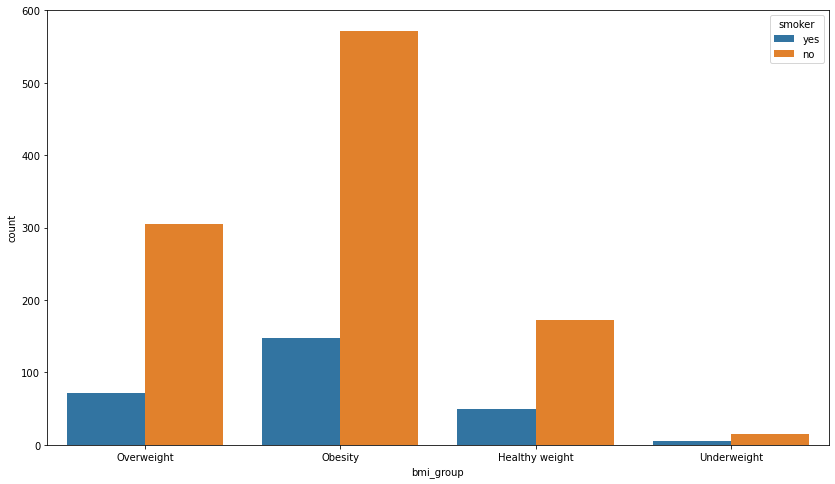

In [43]:
plt.figure(figsize=(14,8))
sns.countplot(data= df, x='bmi_group', hue= 'smoker')

In [58]:
#5. Region and charges

px.bar(x= df.groupby('region')['charges'].sum().index, y= df.groupby('region')['charges'].sum().values)

Increase in charges from the southeast is due to increase in customers from southeast

In [48]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

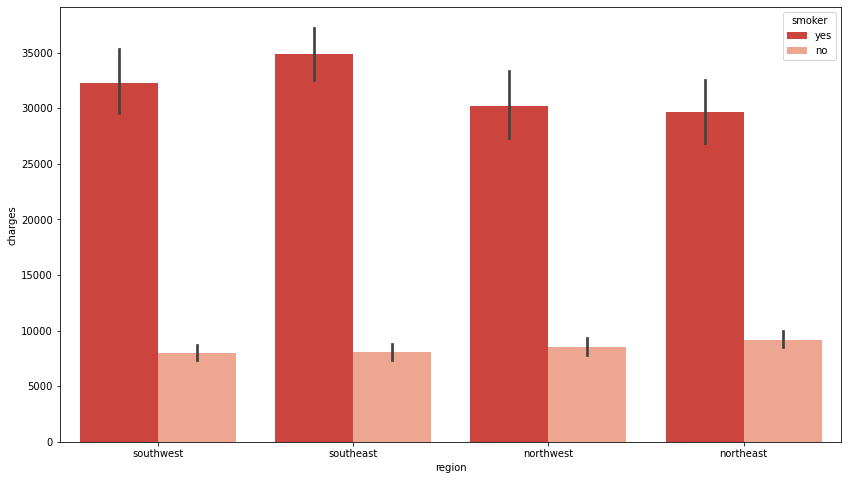

In [59]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='Reds_r')

In [49]:
px.bar(x= df['bmi_group'], y=df['charges'])

charges are based on the healthy status of the customers. Obese customers are paid higher

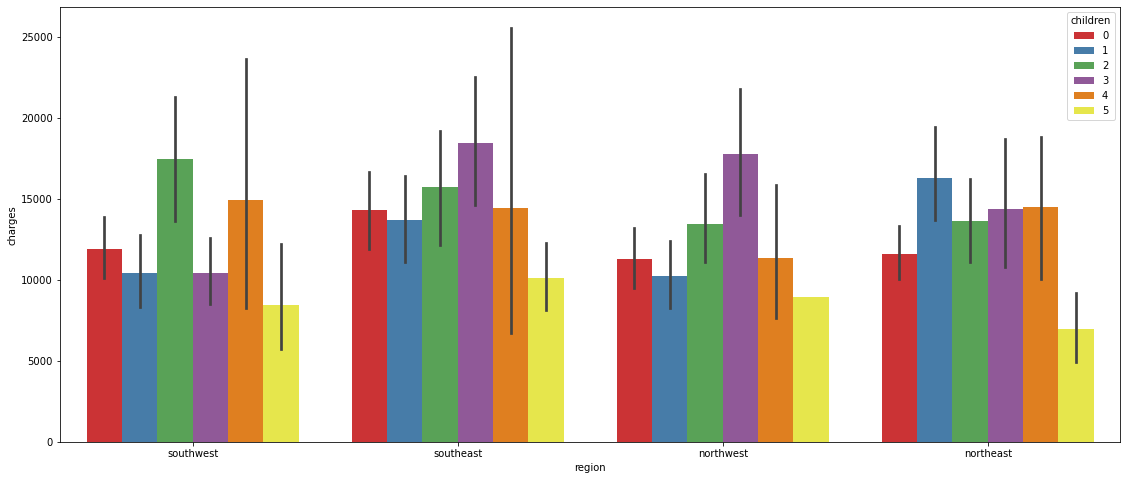

In [60]:
plt.figure(figsize=(19,8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

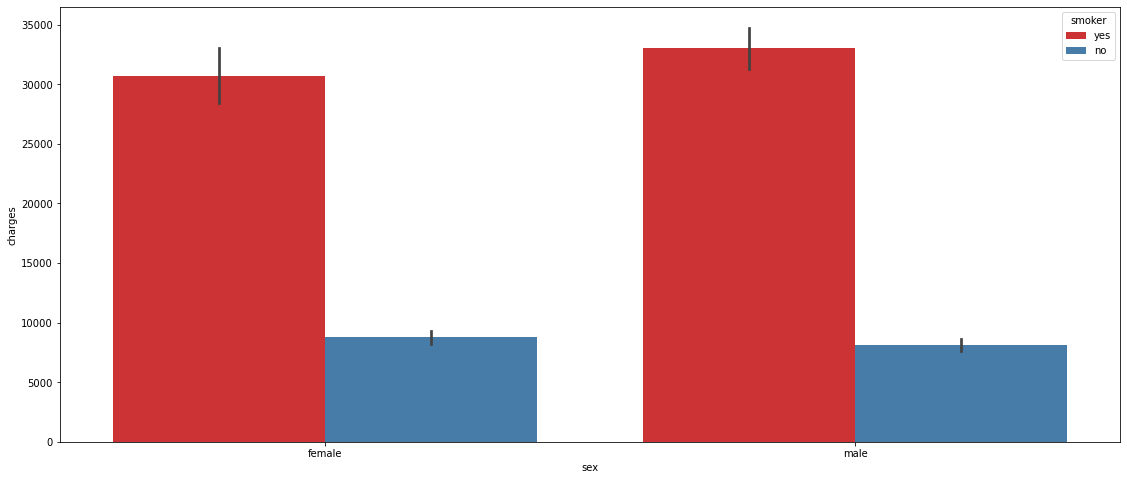

In [63]:
plt.figure(figsize=(19,8))
sns.barplot(x='sex', y='charges', hue='smoker', data=df, palette='Set1')

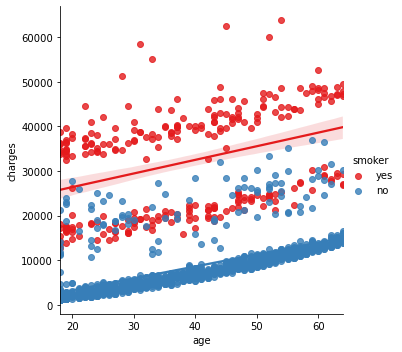

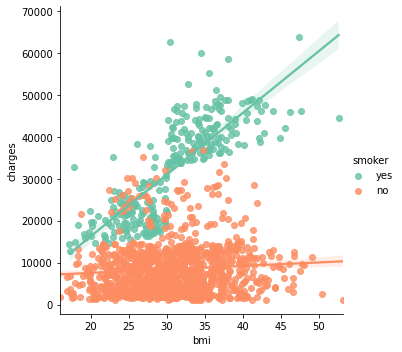

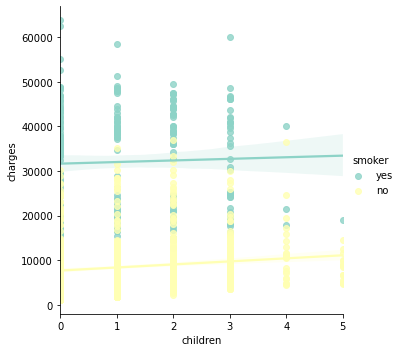

In [64]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')


In [66]:
px.violin(data_frame= df, x= 'children', y='charges', color='smoker', orientation='v')

In [67]:
df.drop('bmi_group', axis=1, inplace= True)

In [77]:
#Label Encoding for categorical variables

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df['region']= label.fit_transform(df['region'])

#dummies for other categorical features

df['sex']= pd.get_dummies(df['sex'], drop_first= True)
df['smoker']= pd.get_dummies(df['smoker'], drop_first=True)

In [73]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


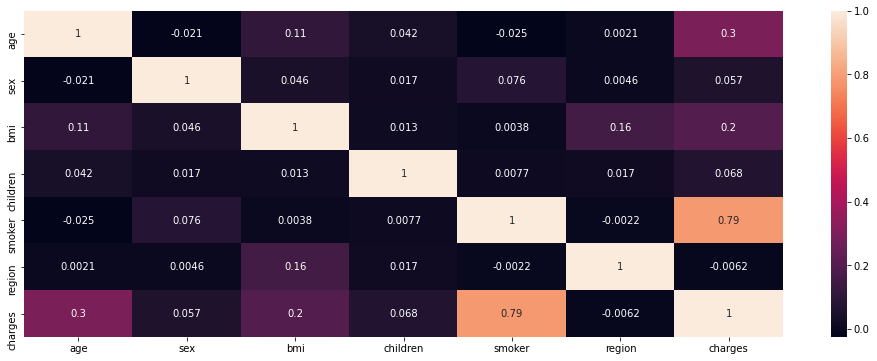

In [79]:
#correlation
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(), annot= True)

very high correlation between smoker and charges.

no sign of multicollinearity

## Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
from sklearn import metrics

In [83]:
X= df.drop('charges', axis=1)
y= df['charges']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 101)

In [85]:
lm= LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [88]:
#coefficients

print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  241.21435603    65.15704604   364.76476396   498.86281184
 23440.62938897  -340.60649259]


In [89]:
# Predicting the test

predictions= lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

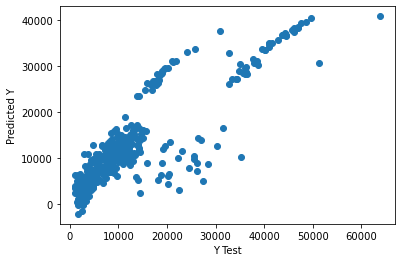

In [95]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [103]:
# Evaluating the Model: parameters- MAE MSE RMSE

print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('\n\n')
print('Value of R square: ', lm.score(X_test, y_test))

MAE:  3990.2503849796185
MSE:  33530131.141361613
RMSE:  5790.520800529224



Value of R square:  0.7613126015198816


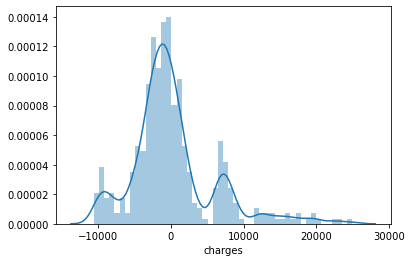

In [98]:
# plot of residuals

sns.distplot((y_test-predictions),bins=50);

Residuals are normally distributed suggesting NO Heteroscedasticity

In [99]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,241.214356
sex,65.157046
bmi,364.764764
children,498.862812
smoker,23440.629389
region,-340.606493


###### Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in AGE is associated with an increase of 241.214 in charges.

Holding all other features fixed, a 1 unit increase in SEX is associated with an increase of 65.157 in charges.

Holding all other features fixed, a 1 unit increase in BMI is associated with an increase of 364.764 in charges.

Holding all other features fixed, a 1 unit increase in CHILDREN is associated with an increase of 498.862 in charges.

Holding all other features fixed, a 1 unit increase in SMOKER is associated with an increase of 23440.629 in charges.

Holding all other features fixed, a 1 unit increase in REGION is associated with an increase of -340.606493 in charges.

### CONCLUSION

##### SMOKING is the greatest factor that affects medical charges.